In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# **Getting the train and test data**

In [13]:
import gdown

url = "https://drive.google.com/uc?id=1_FZIrNug8svcEK5QMDdV2MoHmcCny8kJ&export=download"
output = "train.csv"
gdown.download(url, output)

url = "https://drive.google.com/uc?id=1_FAidr3sAiSWx6mPS26HMpWjVaiSTOXq&export=download"
output = "test.csv"
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=1_FZIrNug8svcEK5QMDdV2MoHmcCny8kJ&export=download
To: /content/train.csv
100%|██████████| 1.24G/1.24G [00:05<00:00, 219MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_FAidr3sAiSWx6mPS26HMpWjVaiSTOXq&export=download
To: /content/test.csv
100%|██████████| 524M/524M [00:03<00:00, 170MB/s]


'test.csv'

In [17]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [18]:
train_df

,Unnamed: 0,lepton_1_pT,lepton_1_eta,lepton_1_phi,lepton_2_pT,lepton_2_eta,lepton_2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1),class
0,0,0.841381,1.832647,-0.689286,0.781839,0.572864,1.577097,0.398978,-0.683847,0.001826,0.651397,0.865560,0.429017,0.439840,0.000000,0.796105,0.342497,0.461542,0.005710,0.0
1,1,0.663798,2.058290,0.681435,1.054036,0.575352,-1.001445,0.462154,-0.833411,0.199734,0.215158,0.949988,0.618046,0.577324,0.000000,0.962927,0.333800,1.455247,0.101246,0.0
2,2,1.792225,-1.099978,0.088109,0.573157,-0.472629,1.642084,1.203374,1.506731,0.457695,-0.640507,1.157024,1.585432,1.215963,0.000000,1.113292,0.645729,0.721326,0.613326,1.0
3,3,0.893018,0.297782,-1.274870,1.316164,1.593303,0.672115,0.307014,-1.189868,0.064561,0.430909,1.162625,0.548821,0.418897,0.163908,1.157707,0.298163,0.803802,0.038902,0.0
4,4,1.338997,0.350023,-1.518510,1.482963,-0.491807,0.340170,0.415071,-1.292034,0.240712,0.611775,1.307798,0.697804,0.473487,0.429977,1.287935,0.330327,0.717237,0.003147,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499995,3499995,1.052621,0.602641,-0.859267,1.498731,0.416403,1.495084,1.104591,0.307900,1.658127,-0.778934,1.022135,1.441749,1.251692,2.646003,1.051955,1.973445,1.203800,0.056984,1.0
3499996,3499996,0.624401,0.361025,1.177020,0.737001,0.380580,1.728161,1.307348,-0.744138,1.962474,-0.641088,0.555763,1.201866,1.919043,2.366463,0.630864,1.763709,1.075939,0.640265,0.0
3499997,3499997,0.719730,-0.655623,-1.236807,0.769770,1.170407,-0.009082,1.505161,0.097434,0.407014,0.097485,1.010633,1.095738,0.962121,0.359156,1.073840,1.268585,1.242062,0.262156,1.0
3499998,3499998,0.670955,-0.450620,-0.880438,0.539060,0.937796,0.357333,0.289037,0.624295,0.197286,0.139753,0.689692,0.490803,0.631491,0.326569,0.664390,0.521536,0.502427,0.198597,0.0


In [19]:
test_df

,Unnamed: 0,lepton_1_pT,lepton_1_eta,lepton_1_phi,lepton_2_pT,lepton_2_eta,lepton_2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
1,1,0.698336,1.689431,-1.134670,0.966594,1.503367,0.880949,0.242573,-0.228654,0.364132,0.109350,0.668554,0.489941,0.650313,0.683634,0.664825,0.510385,0.584092,0.031694
2,2,0.578286,-0.689652,-0.390094,0.480061,-0.632219,1.212005,0.640473,-1.622401,0.872160,-0.186169,0.451853,0.669288,1.314412,0.559444,0.491753,0.559017,1.286520,0.400292
3,3,0.798202,0.099358,-1.095839,0.531147,-0.962327,1.500362,1.273941,0.675408,1.803743,-0.845941,0.685836,1.234757,1.597630,1.864630,0.775854,1.556949,1.245781,0.538010
4,4,1.466649,0.115517,-1.036161,0.877247,0.690861,1.130069,0.890722,0.426515,1.283212,-0.563880,1.090046,1.327570,1.080762,1.588076,1.069615,1.258800,0.443045,0.415406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499995,1499995,0.482755,1.204410,0.299445,0.780271,1.958697,0.938929,0.887801,-1.404129,1.332697,-0.456543,0.551233,0.957969,1.542171,1.982478,0.579808,1.481396,1.006600,0.189843
1499996,1499996,1.085361,0.861342,-1.356951,0.483685,0.059381,0.292341,0.340940,0.761038,0.380255,0.038984,0.774140,0.660777,0.757443,0.331105,0.715807,0.447304,0.320159,0.371521
1499997,1499997,1.339252,-1.753881,0.667430,1.279321,-0.125801,-1.025262,0.996305,-1.425422,1.005658,-0.529824,1.616218,1.278956,0.702218,0.541788,1.649413,1.139551,1.256152,0.159157
1499998,1499998,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599


In [ ]:
'''train_df = pd.read_csv('/kaggle/input/train-testcsv/train.csv')
test_df = pd.read_csv('/kaggle/input/train-testcsv/test.csv')'''

In [ ]:
train_df.head(5)

,Unnamed: 0,lepton_1_pT,lepton_1_eta,lepton_1_phi,lepton_2_pT,lepton_2_eta,lepton_2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1),class
0,0,0.841381,1.832647,-0.689286,0.781839,0.572864,1.577097,0.398978,-0.683847,0.001826,0.651397,0.865560,0.429017,0.439840,0.000000,0.796105,0.342497,0.461542,0.005710,0.0
1,1,0.663798,2.058290,0.681435,1.054036,0.575352,-1.001445,0.462154,-0.833411,0.199734,0.215158,0.949988,0.618046,0.577324,0.000000,0.962927,0.333800,1.455247,0.101246,0.0
2,2,1.792225,-1.099978,0.088109,0.573157,-0.472629,1.642084,1.203374,1.506731,0.457695,-0.640507,1.157024,1.585432,1.215963,0.000000,1.113292,0.645729,0.721326,0.613326,1.0
3,3,0.893018,0.297782,-1.274870,1.316164,1.593303,0.672115,0.307014,-1.189868,0.064561,0.430909,1.162625,0.548821,0.418897,0.163908,1.157707,0.298163,0.803802,0.038902,0.0
4,4,1.338997,0.350023,-1.518510,1.482963,-0.491807,0.340170,0.415071,-1.292034,0.240712,0.611775,1.307798,0.697804,0.473487,0.429977,1.287935,0.330327,0.717237,0.003147,1.0


In [ ]:
test_df.head(5)

,Unnamed: 0,lepton_1_pT,lepton_1_eta,lepton_1_phi,lepton_2_pT,lepton_2_eta,lepton_2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
1,1,0.698336,1.689431,-1.134670,0.966594,1.503367,0.880949,0.242573,-0.228654,0.364132,0.109350,0.668554,0.489941,0.650313,0.683634,0.664825,0.510385,0.584092,0.031694
2,2,0.578286,-0.689652,-0.390094,0.480061,-0.632219,1.212005,0.640473,-1.622401,0.872160,-0.186169,0.451853,0.669288,1.314412,0.559444,0.491753,0.559017,1.286520,0.400292
3,3,0.798202,0.099358,-1.095839,0.531147,-0.962327,1.500362,1.273941,0.675408,1.803743,-0.845941,0.685836,1.234757,1.597630,1.864630,0.775854,1.556949,1.245781,0.538010
4,4,1.466649,0.115517,-1.036161,0.877247,0.690861,1.130069,0.890722,0.426515,1.283212,-0.563880,1.090046,1.327570,1.080762,1.588076,1.069615,1.258800,0.443045,0.415406


In [ ]:
train_df.drop('Unnamed: 0',axis = 1,inplace = True)

In [ ]:
test_df.drop('Unnamed: 0',axis = 1,inplace = True)

In [ ]:
train_df.head(5)

,lepton_1_pT,lepton_1_eta,lepton_1_phi,lepton_2_pT,lepton_2_eta,lepton_2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1),class
0,0.841381,1.832647,-0.689286,0.781839,0.572864,1.577097,0.398978,-0.683847,0.001826,0.651397,0.865560,0.429017,0.439840,0.000000,0.796105,0.342497,0.461542,0.005710,0.0
1,0.663798,2.058290,0.681435,1.054036,0.575352,-1.001445,0.462154,-0.833411,0.199734,0.215158,0.949988,0.618046,0.577324,0.000000,0.962927,0.333800,1.455247,0.101246,0.0
2,1.792225,-1.099978,0.088109,0.573157,-0.472629,1.642084,1.203374,1.506731,0.457695,-0.640507,1.157024,1.585432,1.215963,0.000000,1.113292,0.645729,0.721326,0.613326,1.0
3,0.893018,0.297782,-1.274870,1.316164,1.593303,0.672115,0.307014,-1.189868,0.064561,0.430909,1.162625,0.548821,0.418897,0.163908,1.157707,0.298163,0.803802,0.038902,0.0
4,1.338997,0.350023,-1.518510,1.482963,-0.491807,0.340170,0.415071,-1.292034,0.240712,0.611775,1.307798,0.697804,0.473487,0.429977,1.287935,0.330327,0.717237,0.003147,1.0


In [ ]:
train_df.isnull().sum()

lepton_1_pT                 0
lepton_1_eta                0
lepton_1_phi                0
lepton_2_pT                 0
lepton_2_eta                0
lepton_2_phi                0
missing_energy_magnitude    0
missing_energy_phi          0
MET_rel                     0
axial_MET                   0
M_R                         0
M_TR_2                      0
R                           0
MT2                         0
S_R                         0
M_Delta_R                   0
dPhi_r_b                    0
cos(theta_r1)               0
class                       0
dtype: int64

In [ ]:
test_df.isnull().sum()

lepton_1_pT                 0
lepton_1_eta                0
lepton_1_phi                0
lepton_2_pT                 0
lepton_2_eta                0
lepton_2_phi                0
missing_energy_magnitude    0
missing_energy_phi          0
MET_rel                     0
axial_MET                   0
M_R                         0
M_TR_2                      0
R                           0
MT2                         0
S_R                         0
M_Delta_R                   0
dPhi_r_b                    0
cos(theta_r1)               0
dtype: int64

**There are no null values in the entire train and test data**

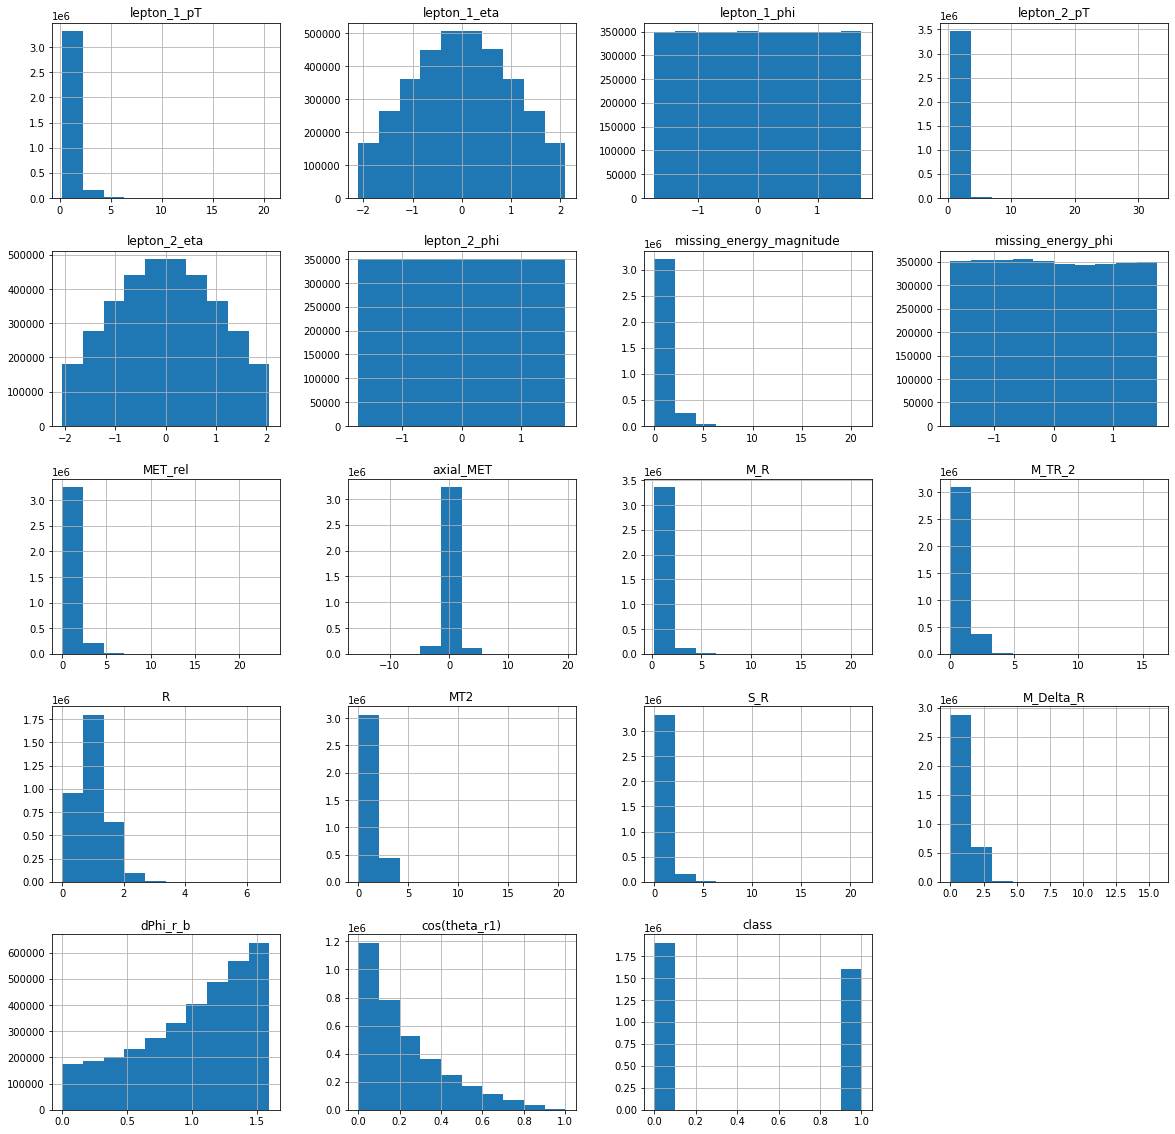

In [ ]:
train_df.hist(figsize=(20,20))
plt.show()

In [ ]:
train_df.describe()

,lepton_1_pT,lepton_1_eta,lepton_1_phi,lepton_2_pT,lepton_2_eta,lepton_2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1),class
count,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06
mean,1.000232e+00,3.599349e-04,3.409634e-04,9.992382e-01,3.546249e-04,-2.609503e-04,9.994536e-01,-4.940216e-04,1.000944e+00,-8.176786e-05,1.000253e+00,9.996171e-01,9.998163e-01,1.000160e+00,9.999674e-01,9.997972e-01,9.992375e-01,2.248649e-01,4.572371e-01
std,6.873955e-01,1.003109e+00,1.001971e+00,6.537354e-01,1.002817e+00,1.001447e+00,8.724024e-01,1.001655e+00,8.897569e-01,1.000707e+00,6.286597e-01,5.839003e-01,4.711496e-01,8.590315e-01,6.205179e-01,6.235858e-01,4.361374e-01,1.970049e-01,4.981681e-01
min,2.548815e-01,-2.102919e+00,-1.734789e+00,4.285860e-01,-2.059306e+00,-1.734202e+00,7.199480e-04,-1.727112e+00,7.693475e-08,-1.533509e+01,2.680643e-01,2.427395e-03,4.528082e-03,0.000000e+00,2.734135e-02,4.452858e-03,3.211849e-07,1.498080e-07,0.000000e+00
25%,5.625003e-01,-7.569637e-01,-8.673235e-01,5.969753e-01,-7.693463e-01,-8.680870e-01,4.781798e-01,-8.663442e-01,3.689606e-01,-4.920890e-01,5.883102e-01,6.222096e-01,6.503162e-01,1.708098e-01,5.984608e-01,5.134528e-01,6.874365e-01,6.910075e-02,0.000000e+00
50%,7.913588e-01,6.139759e-04,-3.000550e-04,7.997329e-01,1.132228e-04,-3.504302e-04,7.734768e-01,-1.038813e-02,8.017117e-01,-8.002724e-02,8.284981e-01,8.778247e-01,9.341271e-01,9.014440e-01,8.353698e-01,9.137308e-01,1.094097e+00,1.671680e-01,0.000000e+00
75%,1.204264e+00,7.581109e-01,8.681473e-01,1.161961e+00,7.698279e-01,8.670100e-01,1.206897e+00,8.681880e-01,1.374708e+00,3.489328e-01,1.210956e+00,1.219851e+00,1.283126e+00,1.612343e+00,1.207777e+00,1.383827e+00,1.369023e+00,3.301480e-01,1.000000e+00
max,2.055345e+01,2.101605e+00,1.734839e+00,3.303562e+01,2.059721e+00,1.734686e+00,2.106888e+01,1.740689e+00,2.338644e+01,1.959220e+01,2.107572e+01,1.616682e+01,6.731210e+00,2.068624e+01,2.115226e+01,1.561370e+01,1.591660e+00,1.000000e+00,1.000000e+00


**Splitting the dataset into train and test. Also dividing the data into feature set and label set. The label column is the 'class' column in the dataset.
Train and test are given to us.**

In [ ]:
X_train = train_df.drop('class',axis = 1)
y_train = train_df['class']
X_test = test_df

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)

StandardScaler()

# Model Building:

My approach was to apply the models which i have come across due course, so as to maximize my learning.

I used 'Hands On Machine Learning' book for referring to these models.

The rationale behind using each classifier is given when they are present in the notebook.

I looked at all these models:

1) Logistic Regression

2) Decision Tree

3) Random Forest

4) AdaBoost

5) Gradient Boosting

6) XGboost

7) Histogram Based Gradient Boosting

The rationale behing not using Support Vector Machines is that the basic vanilla SVM model itself took more than 1 hour for training. That is why I thought of not using SVM.
This was the same case for Voting Classifier as well as Stacking Classifier.


# **Logistic Regression:**

In [ ]:
'''from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression()
model_logreg.fit(X_train,y_train)
y_pred = model_logreg.predict(X_test)
y_pred=pd.DataFrame(y_pred)
y_pred=y_pred.astype('float64')
y_pred.to_csv(path_or_buf='y_pred_log_reg.csv',header=['class'],index_label='Id')'''

"from sklearn.linear_model import LogisticRegression\nmodel_logreg = LogisticRegression()\nmodel_logreg.fit(X_train,y_train)\ny_pred = model_logreg.predict(X_test)\ny_pred=pd.DataFrame(y_pred)\ny_pred=y_pred.astype('float64')\ny_pred.to_csv(path_or_buf='y_pred_log_reg.csv',header=['class'],index_label='Id')"

# **Decision Tree:**

**My rationale for using Decision tree clasiifier over logistic regression**

**Decison tree is a non linear model. Given the complexity of data, I believe a non linea rmodel will give better accuracy on the test data.**

In [ ]:
'''from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)
y_pred=pd.DataFrame(y_pred)
y_pred=y_pred.astype('float64')
y_pred.to_csv(path_or_buf='y_pred_dt.csv',header=['class'],index_label='Id')'''

"from sklearn.tree import DecisionTreeClassifier\nmodel_dt = DecisionTreeClassifier()\nmodel_dt.fit(X_train,y_train)\ny_pred = model_dt.predict(X_test)\ny_pred=pd.DataFrame(y_pred)\ny_pred=y_pred.astype('float64')\ny_pred.to_csv(path_or_buf='y_pred_dt.csv',header=['class'],index_label='Id')"

**Accuracy is 0.7551**

**Cross Validation:**

In [ ]:
'''from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth' : [1,2,3,4,5,6,7,8],
              'criterion' : ['gini','entropy']}
gs_dt = GridSearchCV(model_dt,param_grid = param_grid,cv = 5)
gs_dt.fit(X_train,y_train)
gs_dt.best_params_'''

"from sklearn.model_selection import GridSearchCV\nparam_grid = {'max_depth' : [1,2,3,4,5,6,7,8],\n              'criterion' : ['gini','entropy']}\ngs_dt = GridSearchCV(model_dt,param_grid = param_grid,cv = 5)\ngs_dt.fit(X_train,y_train)\ngs_dt.best_params_"

**Best model**

In [ ]:
'''model_dt = DecisionTreeClassifier(max_depth = 8,criterion = 'gini')
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)
y_pred=pd.DataFrame(y_pred)
y_pred=y_pred.astype('float64')
y_pred.to_csv(path_or_buf='y_pred_dt.csv',header=['class'],index_label='Id')'''

"model_dt = DecisionTreeClassifier(max_depth = 8,criterion = 'gini')\nmodel_dt.fit(X_train,y_train)\ny_pred = model_dt.predict(X_test)\ny_pred=pd.DataFrame(y_pred)\ny_pred=y_pred.astype('float64')\ny_pred.to_csv(path_or_buf='y_pred_dt.csv',header=['class'],index_label='Id')"

**Accuracy is 0.78563**

# **Random Forest:**

**The rationale behind using Random forest is:
Decision trees have low bias and high variance. Desirable is low bias and low variance. Hence it is very prone to learn the features and might give less accuracy over the unseen test set which is 70% of the test set.
Hence I used random forest as it aggregates many decision trees. Hence variance reduces by square root of the total no of trees used.
Hence my assumption is that random forest would better generalize the data.**

In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth = 8, n_estimators = 100, random_state = 42)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
y_pred=pd.DataFrame(y_pred)
y_pred=y_pred.astype('float64')
y_pred.to_csv(path_or_buf='y_pred_rf.csv',header=['class'],index_label='Id')'''

"from sklearn.ensemble import RandomForestClassifier\nmodel_rf = RandomForestClassifier(max_depth = 8, n_estimators = 100, random_state = 42)\nmodel_rf.fit(X_train,y_train)\ny_pred = model_rf.predict(X_test)\ny_pred=pd.DataFrame(y_pred)\ny_pred=y_pred.astype('float64')\ny_pred.to_csv(path_or_buf='y_pred_rf.csv',header=['class'],index_label='Id')"

**Accuracy came out to be: 0.75921**

# **AdaBoost:**

**Now I wanted to try boosting algorithms as it aggregates a large number of weak classifiers (decision trees here) and learns from the result of previous classifier. Boosting is known to reduce bias. The misclassified examples are given more weight on subsequent trees and then trained. Hence what happens is that model tries to better learn the small differences in the training data.**

**So my assumption is that using boosting, my model would be both low bias as well as low variance.
Low bias: Because the model trains from its mistakes from previous classifier
Low Variance: It aggregates many decision trees as aggregation reduces variation(See explanation of random forest,an aggregation technique**

# **Adaptive boosting**

In [ ]:
'''from sklearn.ensemble import AdaBoostClassifier
model_dt = DecisionTreeClassifier(max_depth = 8,criterion = 'gini')
model_rf = AdaBoostClassifier(model_dt, random_state = 42)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
y_pred=pd.DataFrame(y_pred)
y_pred=y_pred.astype('float64')
y_pred.to_csv(path_or_buf='y_pred_ada.csv',header=['class'],index_label='Id')'''

"from sklearn.ensemble import AdaBoostClassifier\nmodel_dt = DecisionTreeClassifier(max_depth = 8,criterion = 'gini')\nmodel_rf = AdaBoostClassifier(model_dt, random_state = 42)\nmodel_rf.fit(X_train,y_train)\ny_pred = model_rf.predict(X_test)\ny_pred=pd.DataFrame(y_pred)\ny_pred=y_pred.astype('float64')\ny_pred.to_csv(path_or_buf='y_pred_ada.csv',header=['class'],index_label='Id')"

**The accuracy is 0.7995**

# **Gradient Boosting:**

**This is a model which uses gradient descent to reach the optima. Here learning rate is a hyperparameter which can be tuned for faster or slower convergence.
Unlike Adaboost, here all the trees are given equal weights.It builds trees on previous classifier’s residuals thus capturing variance in data.

**Compared to AdaBoost, gradient boosting does not penalize missed-classified cases but using loss function instead**

**My rationale for using Gradient Boosting is that I wnated to see that if taking loss into account,rather than increase weights of the misclassified, can it give me a model which gives better accuracy or not.**

In [ ]:
'''from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

model_gb = GradientBoostingClassifier(max_depth = 20,n_estimators = 100,random_state = 42)
model_gb.fit(X_train,y_train)
y_pred = model_gb.predict(X_test)
y_pred=pd.DataFrame(y_pred)
y_pred=y_pred.astype('float64')
y_pred.to_csv(path_or_buf='y_pred_gb.csv',header=['class'],index_label='Id')'''

"from sklearn.ensemble import GradientBoostingClassifier\nfrom sklearn.tree import DecisionTreeClassifier\n\nmodel_gb = GradientBoostingClassifier(max_depth = 20,n_estimators = 100,random_state = 42)\nmodel_gb.fit(X_train,y_train)\ny_pred = model_gb.predict(X_test)\ny_pred=pd.DataFrame(y_pred)\ny_pred=y_pred.astype('float64')\ny_pred.to_csv(path_or_buf='y_pred_gb.csv',header=['class'],index_label='Id')"

**By this time the boosting algorithms are giving me better accuracy on the test set compared to all previous algorithms. SO I would like to try out other boosting techniques given in the book and look for models giving me better accuracy.**

**Accuracy is 0.78539**

# **Histogram Based Gradient Boosting Classifier:**

**Training the trees that are added to the ensemble can be dramatically accelerated by discretizing (binning) the continuous input variables to a few hundred unique values. Gradient boosting ensembles that implement this technique and tailor the training algorithm around input variables under this transform are referred to as histogram-based gradient boosting ensembles.**

**The only rationale to use this model was that it gave me better training speed when training using gradient boosting**

In [ ]:
'''from sklearn.ensemble import HistGradientBoostingClassifier
model_hgbc = HistGradientBoostingClassifier(learning_rate=0.01, max_depth=100, max_iter=2000, max_leaf_nodes=100,random_state = 42)
model_hgbc.fit(X_train,y_train)
y_pred = model_hgbc.predict(X_test)
y_pred = model_hgbc.predict(X_test)
y_pred=pd.DataFrame(y_pred)
y_pred=y_pred.astype('float64')
y_pred.to_csv(path_or_buf='y_pred_hist.csv',header=['class'],index_label='Id')'''

"from sklearn.ensemble import HistGradientBoostingClassifier\nmodel_hgbc = HistGradientBoostingClassifier(learning_rate=0.01, max_depth=100, max_iter=2000, max_leaf_nodes=100,random_state = 42)\nmodel_hgbc.fit(X_train,y_train)\ny_pred = model_hgbc.predict(X_test)\ny_pred = model_hgbc.predict(X_test)\ny_pred=pd.DataFrame(y_pred)\ny_pred=y_pred.astype('float64')\ny_pred.to_csv(path_or_buf='y_pred_hist.csv',header=['class'],index_label='Id')"

**Accuracy is 0.80234**

# **Extreme Gradient Boosting:**

****This model was not stated in the book but I got information about this model from internet****

**Extreme gradient boosting or XGBoost is a more regularized form of Gradient Boosting. XGBoost uses regularization (L1 & L2), which improves model generalization capabilities.**

**XGBoost delivers high performance as compared to Gradient Boosting. Its training is very fast and can be parallelized across clusters.**

**When to use XGBoost?
When there is a larger number of training samples. Ideally, greater than 1000 training samples and less 100 features or we can say when the number of features < number of training samples.
When there is a mixture of categorical and numeric features or just numeric features.**

Citation:
https://towardsdatascience.com/a-brief-introduction-to-xgboost-3eaee2e3e5d6#:~:text=XGBoost%20vs%20Gradient%20Boosting,can%20be%20parallelized%20across%20clusters.

In [ ]:
'''import xgboost as xgb
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train,y_train)
y_pred = model_xgb.predict(X_test)
y_pred=pd.DataFrame(y_pred)
y_pred=y_pred.astype('float64')
y_pred.to_csv(path_or_buf='y_pred_xgb_final.csv',header=['class'],index_label='Id')'''

"import xgboost as xgb\nmodel_xgb = xgb.XGBClassifier()\nmodel_xgb.fit(X_train,y_train)\ny_pred = model_xgb.predict(X_test)\ny_pred=pd.DataFrame(y_pred)\ny_pred=y_pred.astype('float64')\ny_pred.to_csv(path_or_buf='y_pred_xgb_final.csv',header=['class'],index_label='Id')"

**Accuracy is : 0.80278**

**Cross Validation for Extreme Gradient Boosting:**

**I didn't know the practical (not theoritcal as theoretical range is very vague for cross validation) optimal range for the parameters of XGBoost. Hence the I referred the article on kaggle which I have given link below. **



https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook

In [ ]:
'''from sklearn.model_selection import GridSearchCV
model_xgb = xgb.XGBClassifier(min_child_weight=7,learning_rate = 0.05,tree_method = 'gpu_hist',random_state = 42)
param_grid = {'n_estimators':[300,200,100],
              'max_depth': range(20,8,-2),
              'gamma':(1,9,1),
            'colsample_bytree' : range(0,1,3),
            'reg_lambda' : range(0,1,10),
            'reg_alpha' : range(0,20,5),
            'subsample' : 0.6
             }
gs_xgb = GridSearchCV(model_xgb,param_grid = param_grid,cv = 5, verbose=3)
gs_xgb.fit(X_train,y_train)'''

"from sklearn.model_selection import GridSearchCV\nmodel_xgb = xgb.XGBClassifier(min_child_weight=7,learning_rate = 0.05,tree_method = 'gpu_hist',random_state = 42)\nparam_grid = {'n_estimators':[300,200,100],\n              'max_depth': range(20,8,-2),\n              'gamma':(1,9,1),\n            'colsample_bytree' : range(0,1,3),\n            'reg_lambda' : range(0,1,10),\n            'reg_alpha' : range(0,20,5),\n            'subsample' : 0.6\n             }\ngs_xgb = GridSearchCV(model_xgb,param_grid = param_grid,cv = 5, verbose=3)\ngs_xgb.fit(X_train,y_train)"

In [ ]:
'''gs_xgb.best_params_'''

'gs_xgb.best_params_'

# **Extreme Gradient Boosting: Final Model**

In [ ]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(max_depth = 17,
                              gamma = 2.0,
                              n_estimators = 300,
                              learning_rate = 0.05,
                              min_child_weight = 7,
                              subsample = 0.6,
                              colsample_bytree = 0.67,
                              colsample_bylevel = 0.67,
                              colsample_bynode = 0.67,
                              reg_lambda = 0.9,
                              reg_alpha = 15.0,
                              n_jobs = -1,
                              random_state = 42)
model_xgb.fit(X_train,y_train)
y_pred = model_xgb.predict(X_test)
y_pred=pd.DataFrame(y_pred)
y_pred=y_pred.astype('float64')
y_pred.to_csv(path_or_buf='y_pred_xgb_final.csv',header=['class'],index_label='Id')

**Accuracy is : 0.80425**

**I didn't use stacking classifier as it took too much time**